# SVM Model code

The code in this notebook file was used to create our SVM model and is sturctured like this: 

1. Data preperation and splitting the data
2. Training and evaluating the model
3. Visualizing correctly and incorrectly signs
4. RandomizedSearchCV cross-validation to find best parameters

## 1. Data preperation and splitting the data

load the data
segment the data
feature the data
visualise the data


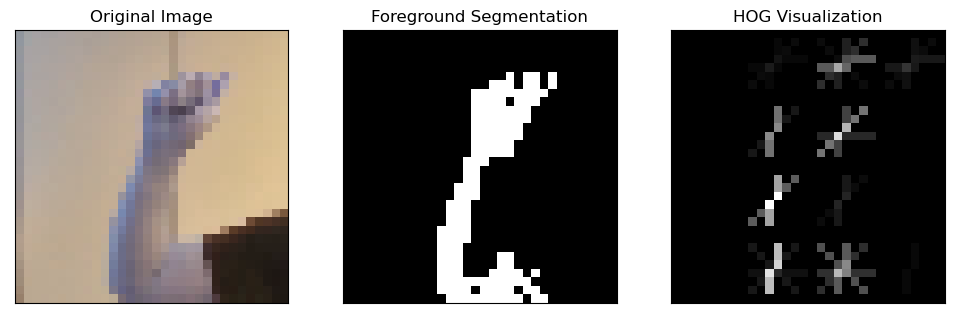

In [11]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random


# Set directory containing the dataset
data_dir = "raadata_BS_H_N"

def visualize_segmentation_and_hog(image, segmented_image, hog_image):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax2.imshow(segmented_image, cmap='gray')
    ax2.set_title('Foreground Segmentation')
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    ax3.imshow(hog_image, cmap='gray')
    ax3.set_title('HOG Visualization')
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    plt.show()


import random

#This code was is used during for testing

# def load_data(data_dir, sampling_ratio=0.2):
#     images, labels = [], []
#     for label, folder in enumerate(os.listdir(data_dir)):
#         folder_path = os.path.join(data_dir, folder)
#         img_files = os.listdir(folder_path)

#         # Select a random subset of the image files in the folder
#         sample_size = int(len(img_files) * sampling_ratio)
#         img_files_sample = random.sample(img_files, sample_size)

#         for img_file in img_files_sample:
#             img_path = os.path.join(folder_path, img_file)
#             img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#             # Resize the image to 64x64
#             img_resized = cv2.resize(img, (64, 64))
#             # Normalize the image to a range of 0-1
#             #img_normalized = img_resized / 255.0
#             images.append(img_resized)
#             labels.append(label)
#     return images, labels



#function to load images and labels from the dataset
def load_data(data_dir):
    images, labels = [], []
    for label, folder in enumerate(os.listdir(data_dir)):
        folder_path = os.path.join(data_dir, folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            # Resize the image to 64x64
            img_resized = cv2.resize(img, (32, 32))
            images.append(img_resized)
            labels.append(label)
    return images, labels

# function to preform Foreground/background segmentation
def segment_images(images):
    segmented_images = []
    for img in images:
        # Convert the image to the LAB color space
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

        # Define the lower and upper bounds for the A and B channels
        lower_bound = np.array([0, 134, 85])
        upper_bound = np.array([255, 145, 165])

        # Threshold the image based on the A and B channels
        mask = cv2.inRange(img_lab, lower_bound, upper_bound)

        # Normalize the segmented image to a range of 0-1
        mask_normalized = mask / 255.0
        segmented_images.append(mask_normalized)
    return segmented_images




# Extract HOG features and hog images for training and vizualisation
def extract_hog_features(segmented_images, cell_size=(8, 8), block_size=(2, 2), nbins=15):
    hog_features = []
    hog_images = []
    for img in segmented_images:
        hog_feat, hog_img = hog(img, orientations=nbins, pixels_per_cell=cell_size, cells_per_block=block_size, block_norm='L2', visualize=True)
        hog_features.append(hog_feat)
        hog_images.append(hog_img)
    return hog_features, hog_images




# Load the data
print("load the data")
images, labels = load_data(data_dir)

# Segment the loaded images
print("segment the data")
segmented_images = segment_images(images)


# Extract HOG features and visualization images
print("feature the data")
hog_features, hog_images = extract_hog_features(segmented_images)

print("visualise the data")
# Display an example of segmentation and HOG feature extraction
index = 0
visualize_segmentation_and_hog(images[index], segmented_images[index], hog_images[index])


#split the data randomly into a 70/30 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.3, random_state=12)



## 2. Training and evaluating the model


In [12]:
import time
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

#List of label/class names for the classification report
class_names = ['A', 'Æ', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'Ø', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Create and train the SVM model
svm = SVC(kernel='rbf', C=100, gamma=0.1)

# Measure training time
start_time = time.time()
svm.fit(X_train, y_train)
training_time = time.time() - start_time

# Test the model
# Measure prediction time
start_time = time.time()
y_pred = svm.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time (seconds):", training_time)
print("Prediction time (seconds):", prediction_time)
print("Classification report:\n", classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.999039780521262
Training time (seconds): 5.085149049758911
Prediction time (seconds): 15.674546003341675
Classification report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       280
           Æ       1.00      1.00      1.00       271
           B       1.00      1.00      1.00       270
           C       1.00      1.00      1.00       284
           D       1.00      1.00      1.00       274
           E       1.00      1.00      1.00       275
           F       1.00      1.00      1.00       272
           G       1.00      1.00      1.00       263
           I       1.00      1.00      1.00       276
           J       1.00      1.00      1.00       277
           K       1.00      1.00      1.00       252
           L       1.00      1.00      1.00       281
           M       1.00      1.00      1.00       253
           N       1.00      1.00      1.00       270
           O       0.99      1.00      1.00     

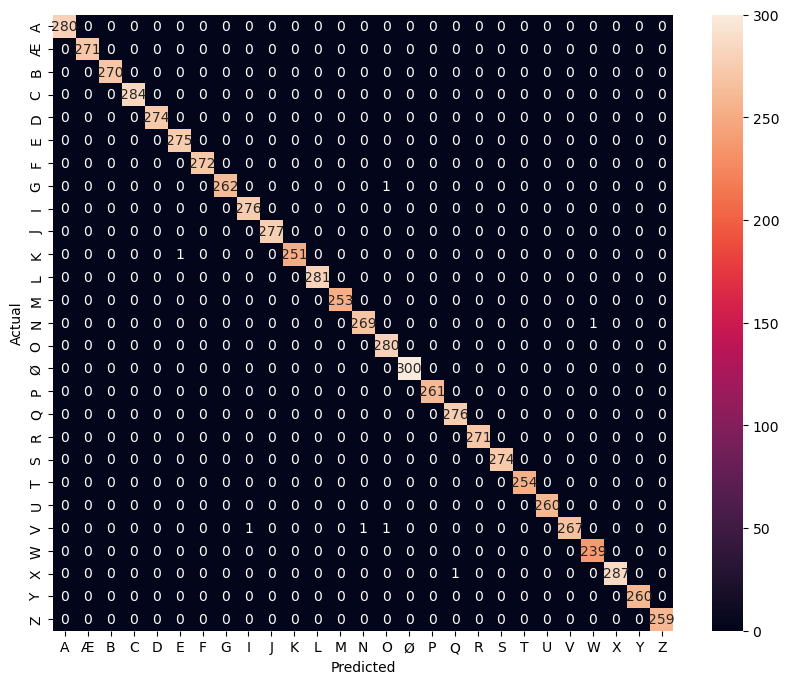

In [13]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
#Saving the model

import pickle
with open("32x32_svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)


## 3. Visualizing correctly and incorrectly signs


In [9]:
#gather the indices of the training data using the same random seed as we did during training. So we can display correctly and incorrectly predicted images.
indices = list(range(len(hog_features))) 
train_indices, test_indices, y_train, y_test = train_test_split(indices, labels, test_size=0.3, random_state=12)
X_train = [hog_features[i] for i in train_indices]
X_test = [hog_features[i] for i in test_indices]


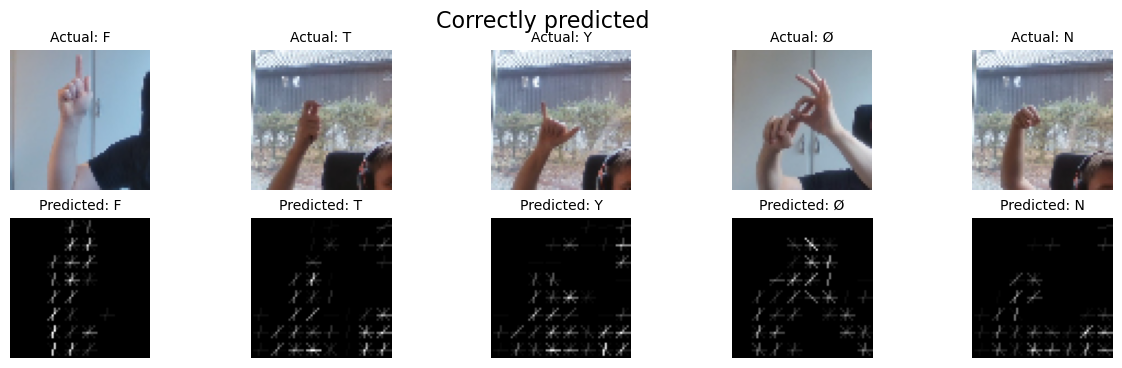

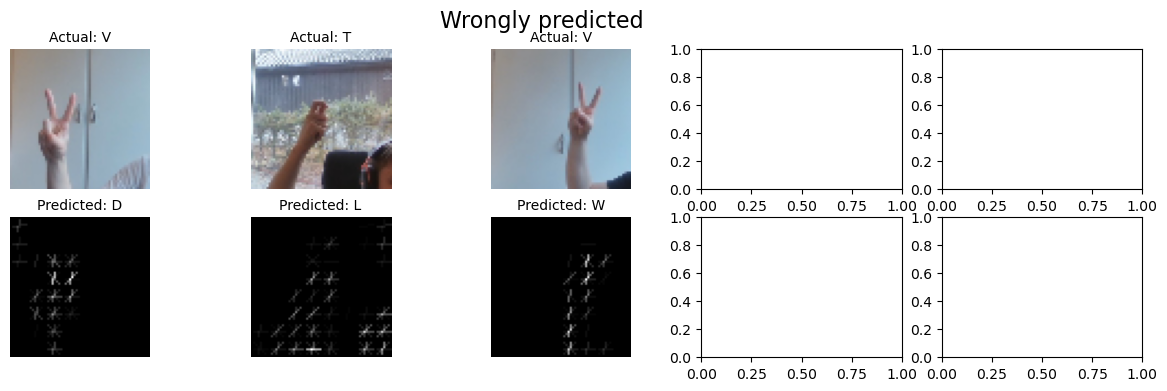

In [10]:
# get the indices of the correctly and incorrectly predicted samples
correct_idx = np.where(y_test == y_pred)[0]
incorrect_idx = np.where(y_test != y_pred)[0]

# choose 5 random instances from each set of indices
correct_samples = np.random.choice(correct_idx, size=5, replace=False)
if len(incorrect_idx) >= 5:
    incorrect_samples = np.random.choice(incorrect_idx, size=5, replace=False)
else:
    incorrect_samples = np.random.choice(incorrect_idx, size=len(incorrect_idx), replace=False)

# Display the 5 correctly predicted samples
fig, axes = plt.subplots(2, 5, figsize=(15, 4))
fig.suptitle('Correctly predicted', fontsize=16)

for i, idx in enumerate(correct_samples):
    orig_img = images[test_indices[idx]]
    orig_label = class_names[y_test[idx]]
    hog_img = hog_images[test_indices[idx]]
    
    axes[0, i].imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Actual: {orig_label}', fontsize=10)
    axes[0, i].axis('off')

    axes[1, i].imshow(hog_img, cmap='gray')
    axes[1, i].set_title(f'Predicted: {class_names[y_pred[idx]]}', fontsize=10)
    axes[1, i].axis('off')

# Display the 5 wrongly predicted samples
fig, axes = plt.subplots(2, 5, figsize=(15, 4))
fig.suptitle('Wrongly predicted', fontsize=16)

for i, idx in enumerate(incorrect_samples):
    orig_img = images[test_indices[idx]]
    orig_label = class_names[y_test[idx]]
    hog_img = hog_images[test_indices[idx]]

    axes[0, i].imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Actual: {orig_label}', fontsize=10)
    axes[0, i].axis('off')

    axes[1, i].imshow(hog_img, cmap='gray')
    axes[1, i].set_title(f'Predicted: {class_names[y_pred[idx]]}', fontsize=10)
    axes[1, i].axis('off')

plt.show()


## 4. RandomizedSearchCV cross-validation to find best parameters

c:\Users\benja\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=25. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


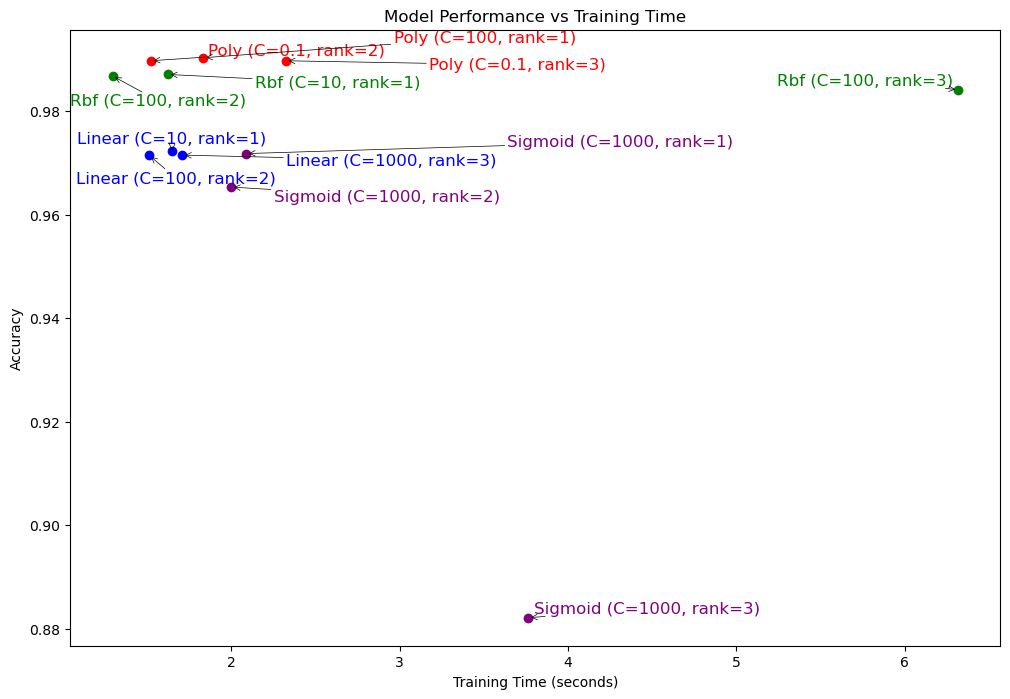


Based on the highest accuracy and lowest training time, the recommended kernel and its parameters are:
Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [2]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import random
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Parameter grids for different kernels
param_grid_linear = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear'],
}

param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

param_grid_poly = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['poly'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4, 5],
    'coef0': [0, 1, 2, 3],
}

param_grid_sigmoid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['sigmoid'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'coef0': [0, 1, 2, 3],
}

n_iter = 25
svm = SVC()

# Run RandomizedSearchCV for different kernels
results_linear = RandomizedSearchCV(svm, param_grid_linear, scoring='accuracy', n_iter=n_iter, cv=5, n_jobs=-1, random_state=12).fit(X_train, y_train).cv_results_
results_rbf = RandomizedSearchCV(svm, param_grid_rbf, scoring='accuracy', n_iter=n_iter, cv=5, n_jobs=-1, random_state=12).fit(X_train, y_train).cv_results_
results_poly = RandomizedSearchCV(svm, param_grid_poly, scoring='accuracy', n_iter=n_iter, cv=5, n_jobs=-1, random_state=12).fit(X_train, y_train).cv_results_
results_sigmoid = RandomizedSearchCV(svm, param_grid_sigmoid, scoring='accuracy', n_iter=n_iter, cv=5, n_jobs=-1, random_state=12).fit(X_train, y_train).cv_results_

# Function to get the top n models
def get_top_models(results_dict, n=3):
    sorted_results = sorted(results_dict['params'], key=lambda x: results_dict['mean_test_score'][results_dict['params'].index(x)], reverse=True)[:n]
    top_models = []
    for i, result in enumerate(sorted_results, start=1):
        model = {'rank': i, 'mean_test_score': results_dict['mean_test_score'][results_dict['params'].index(result)], 'params': result, 'mean_fit_time': results_dict['mean_fit_time'][results_dict['params'].index(result)]}
        top_models.append(model)
    return top_models

# Get the top n models for each kernel
top_linear = get_top_models(results_linear, n=3)
top_rbf = get_top_models(results_rbf, n=3)
top_poly = get_top_models(results_poly, n=3)
top_sigmoid = get_top_models(results_sigmoid, n=3)

# Function to train and evaluate the top models
def train_and_evaluate_top_models(top_models, X_train, y_train, X_test, y_test):
    trained_models = []
    for model in top_models:
        svm = SVC(**model['params'])
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        trained_models.append({'params': model['params'], 'accuracy': accuracy, 'mean_fit_time': model['mean_fit_time']})
    return trained_models

# Train and evaluate the top models
trained_linear = train_and_evaluate_top_models(top_linear, X_train, y_train, X_test, y_test)
trained_rbf = train_and_evaluate_top_models(top_rbf, X_train, y_train, X_test, y_test)
trained_poly = train_and_evaluate_top_models(top_poly, X_train, y_train, X_test, y_test)
trained_sigmoid = train_and_evaluate_top_models(top_sigmoid, X_train, y_train, X_test, y_test)

all_trained_models = trained_linear + trained_rbf + trained_poly + trained_sigmoid

# Visualize the results
kernel_colors = {'linear': 'blue', 'rbf': 'green', 'poly': 'red', 'sigmoid': 'purple'}
points = []
annotations = []

for kernel, models in zip(['linear', 'rbf', 'poly', 'sigmoid'], [top_linear, top_rbf, top_poly, top_sigmoid]):
    for model in models:
        accuracy = model['mean_test_score']
        time = model['mean_fit_time']
        points.append((time, accuracy, kernel_colors[kernel]))
        annotations.append(f"{kernel.capitalize()} (C={model['params']['C']}, rank={model['rank']})")

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

texts = []
for point, annotation, color in zip(points, annotations, [p[2] for p in points]):
    plt.scatter(point[0], point[1], color=color)
    texts.append(ax.text(point[0], point[1], annotation, fontsize=12, color=color))

# Set axis labels and title
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Training Time')

# Adjust the text to minimize overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

plt.show()

# Find the best model with the highest accuracy and lowest training time
best_model_index = np.argmax(np.array([model['accuracy'] for model in all_trained_models]) / np.array([model['mean_fit_time'] for model in all_trained_models]))
best_model = all_trained_models[best_model_index]

# Print the recommended kernel and its parameters
print(f"\nBased on the highest accuracy and lowest training time, the recommended kernel and its parameters are:")
print(f"Parameters: {best_model['params']}")

